In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
json_path = "Soccer_Data/players.json"

In [55]:
def unicode_conversion(s):
    return s.encode("utf-8").decode("unicode_escape")

In [64]:
with open(json_path, "r", encoding="utf-8") as f:
    player_data = json.load(f)
    # print(json.dumps(player_data, indent = 2))

for player in player_data:
    if player["passportArea"]["name"] == 'Germany' and player["currentNationalTeamId"] == 3148:
        print(unicode_conversion(player["firstName"]), unicode_conversion(player["lastName"]))



Niklas Süle
Mesut Özil
Timo Werner
Manuel Neuer
Jérôme Boateng
Toni Kroos
Thomas Müller
Mats  Hummels
İlkay Gündoğan
Julian Draxler
Matthias Ginter
Marc-André ter Stegen
Marco Reus
Kevin Trapp
Marvin Plattenhardt
Julian Brandt
Sebastian Rudy
Jonas Hector
Leon  Goretzka
Joshua Kimmich


In [74]:
test_df = []

for player in player_data:
    test_df.append({
        "first_name": unicode_conversion(player.get("firstName", "")),
        "last_name": unicode_conversion(player.get("lastName", "")),
        "nationality": player["passportArea"]["name"],
        "height_cm": player.get("height"),
        "position": player["role"]["name"]
    })

df = pd.DataFrame(test_df)

print(df)

             first_name       last_name nationality  height_cm    position
0                 Harun           Tekin      Turkey        187  Goalkeeper
1                Malang            Sarr     Senegal        182    Defender
2                  Over        Mandanda      France        176  Goalkeeper
3     Alfred John Momar         N'Diaye     Senegal        187  Midfielder
4              Ibrahima          Konaté      France        192    Defender
...                 ...             ...         ...        ...         ...
3598                Ali         Maâloul     Tunisia        175    Defender
3599     Carlos Alberto  Cáceda Oyaguez        Peru        183  Goalkeeper
3600  Miguel Gianpierre   Araujo Blanco        Peru        179    Defender
3601         Ahmed Reda       Tagnaouti     Morocco        182  Goalkeeper
3602            Ricardo   Guardia Avila      Panama          0  Midfielder

[3603 rows x 5 columns]


<Axes: xlabel='position', ylabel='height_cm'>

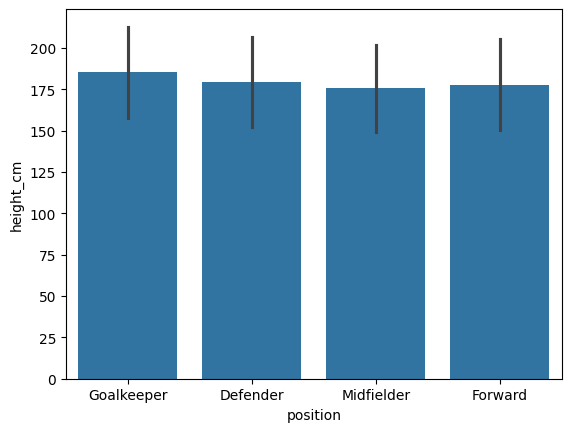

In [76]:
sns.barplot(df, x="position", y="height_cm", errorbar="sd")

In [95]:
world_cup_matches_path = "Soccer_Data/matches/matches_World_Cup.json"

with open(world_cup_matches_path, 'r') as wc_match_file:
    world_cup_match_data = json.load(wc_match_file)

for match in world_cup_match_data:
    if match["seasonId"] == 10078:
        # print(match["label"])
        pass

for match in world_cup_match_data:
    if match["groupName"] == "Group F":
        print(match["label"])

for match in world_cup_match_data:
    if match["wyId"] == 2057976:
        print(match["label"])


Mexico - Sweden, 0 - 3
Korea Republic - Germany, 2 - 0
Germany - Sweden, 2 - 1
Korea Republic - Mexico, 1 - 2
Sweden - Korea Republic, 1 - 0
Germany - Mexico, 0 - 1
Nigeria - Argentina, 1 - 2


In [116]:
player_data
world_cup_match_data

team_path = "Soccer_Data/teams.json"

with open(team_path, "r", encoding="utf-8") as team_file:
    team_data = json.load(team_file)
    

player_lookup = {p["wyId"]: p for p in player_data}


team_lookup = {t["wyId"]: t for t in team_data}



for match in world_cup_match_data:
    if match["wyId"] == 2057986:
        print(match["label"])

        for team_id, team in match["teamsData"].items():

            print("\n", team_lookup.get(int(team_id))["name"])
            for entry in team["formation"]["lineup"]:
                pid = entry["playerId"]

                p = player_lookup.get(pid)
                if p:
                    print(
                        unicode_conversion(p.get("firstName", "")),
                        unicode_conversion(p.get("lastName", ""))
                    )
                    

{'city': 'Frankfurt am Main', 'name': 'Germany', 'wyId': 3148, 'officialName': 'Germany', 'area': {'name': 'Germany', 'id': 276, 'alpha3code': 'DEU', 'alpha2code': 'DE'}, 'type': 'national'}
Germany - Sweden, 2 - 1

 Germany
Sebastian Rudy
Julian Draxler
Jonas Hector
Jérôme Boateng
Thomas Müller
Marco Reus
Timo Werner
Joshua Kimmich
Manuel Neuer
Antonio Rüdiger
Toni Kroos

 Sweden
Viktor Claesson
Ola Toivonen
Marcus Berg
Mikael Lustig
Robin Olsen
Victor Nilsson Lindelöf
Albin Ekdal
Sebastian Larsson
Andreas Granqvist
Hans Carl Ludwig Augustinsson
Emil Forsberg


In [137]:
event_path = "Soccer_Data/events/events_World_Cup.json"

goal_events = []

with open(event_path, "r") as event_file:
    event_data = json.load(event_file)

for event in event_data:
    if event["matchId"] == 2057986:
        if (
            any(tag["id"] == 101 for tag in event["tags"]) and
            any(tag["id"] == 1801 for tag in event["tags"])
        ):
            goal_events.append(event)

count = 1
for i in goal_events:
    p = player_lookup.get(i["playerId"])
    print(i["tags"], i['eventSec'], unicode_conversion(p.get("firstName", "")), unicode_conversion(p.get("lastName", "")))
    count += 1
    

                
                

[{'id': 101}, {'id': 1901}, {'id': 402}, {'id': 201}, {'id': 1204}, {'id': 1801}] 1907.518618 Ola Toivonen
[{'id': 101}, {'id': 401}, {'id': 201}, {'id': 1205}, {'id': 1801}] 149.09795200000008 Marco Reus
[{'id': 101}, {'id': 402}, {'id': 1102}, {'id': 201}, {'id': 1206}, {'id': 1801}] 2982.463011 Toni Kroos


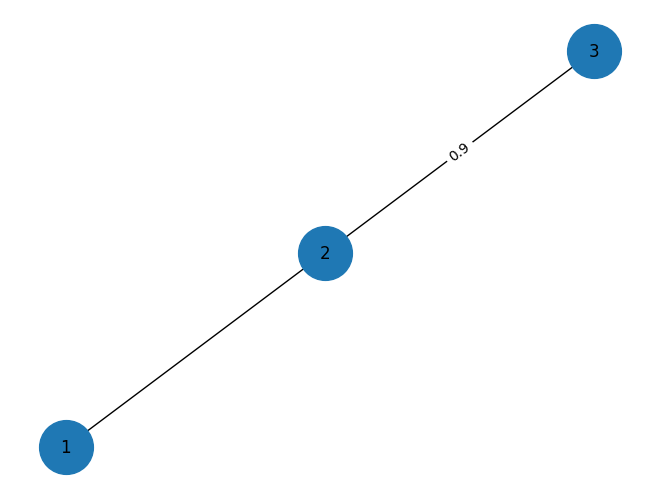

In [143]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3, weight=0.9)

pos = nx.spring_layout(G)  # auto layout

nx.draw(G, pos, with_labels=True, node_size=1500)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


'round_table.png'

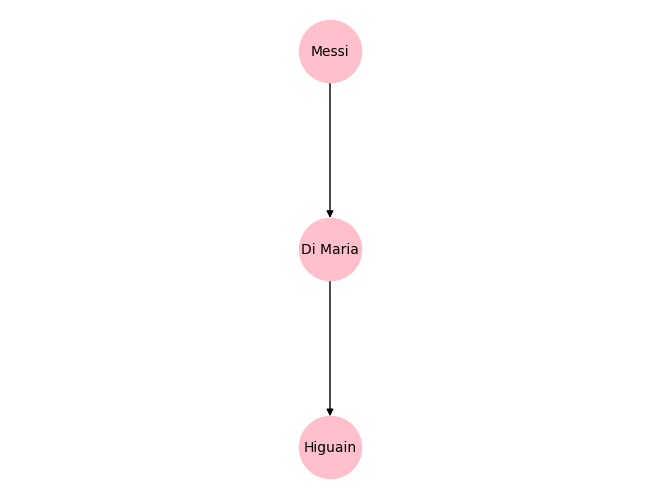

In [153]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

G = nx.DiGraph()
G.add_edge("Messi", "Di Maria", weight=5)
G.add_edge("Di Maria", "Higuain", weight=3)

pos = graphviz_layout(G, prog="dot")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="pink",
    font_size=10
)

plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

event_path = "Soccer_Data/events/events_World_Cup.json"
with open(event_path, "r") as event_file:
    event_data = json.load(event_file)

json_path = "Soccer_Data/players.json"
with open(json_path, "r", encoding="utf-8") as f:
    player_data = json.load(f)
    # print(json.dumps(player_data, indent = 2))



player_by_id = {p["wyId"]: p for p in player_data}

result_tally = {}
for i, event in enumerate(event_data[:-1]):
    if event.get("eventName") != "Pass":
        continue
    
    if not any(tag.get("id") == 1801 for tag in event.get("tags", [])):
        continue

    next_event = event_data[i+1]
    
    passer = event.get("playerId")
    receiver = next_event.get("playerId")
    # print(unicode_conversion(player_by_id[passer].get("lastName")), "->", 
    #                          unicode_conversion(player_by_id[receiver].get("lastName")))

    

    key = tuple(sorted([
        unicode_conversion(player_by_id[passer].get("lastName")),
        unicode_conversion(player_by_id[receiver].get("lastName"))
    ]))



    result_tally[key] = result_tally.get(key, 0) + 1


node_paths = [(p1, p2, wt) for (p1, p2), wt in result_tally.items()]

G = nx.Graph()

for p1, p2, w in node_paths:
    G.add_edge(p1,p2, wright=w)

pos = graphviz_layout(G, prog="dot")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="pink",
    font_size=10
)

plt.show()

